# 📊 Large-Scale Social Media Analytics

Instagram vs YouTube – Full Analysis Notebook

## 1️⃣ Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2️⃣ Load Dataset

In [7]:
df = pd.read_csv('socila.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Instagram_ID,YouTube_Channel_Name,Instagram_Followers,YouTube_Subscribers,Instagram_Posts,YouTube_Videos,Instagram_Likes,YouTube_Views
0,2012-01-01,@techwitharjun,Tech With Arjun,2043,1532,100,60,2215,79989
1,2012-01-02,@techwitharjun,Tech With Arjun,2099,1548,100,61,3407,20904
2,2012-01-03,@techwitharjun,Tech With Arjun,2132,1590,101,61,602,20396
3,2012-01-04,@techwitharjun,Tech With Arjun,2151,1630,102,61,4833,59039
4,2012-01-05,@techwitharjun,Tech With Arjun,2198,1675,102,61,3073,9334


## 3️⃣ Dataset Overview

In [8]:
df.shape

(100000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  100000 non-null  datetime64[ns]
 1   Instagram_ID          100000 non-null  object        
 2   YouTube_Channel_Name  100000 non-null  object        
 3   Instagram_Followers   100000 non-null  int64         
 4   YouTube_Subscribers   100000 non-null  int64         
 5   Instagram_Posts       100000 non-null  int64         
 6   YouTube_Videos        100000 non-null  int64         
 7   Instagram_Likes       100000 non-null  int64         
 8   YouTube_Views         100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 6.9+ MB


In [10]:
df.describe()

,Date,Instagram_Followers,YouTube_Subscribers,Instagram_Posts,YouTube_Videos,Instagram_Likes,YouTube_Views
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2018-11-04 12:00:00,82170.752070,68883.735450,1339.927110,1307.580840,2646.25197,42422.630230
min,2012-01-01 00:00:00,2005.000000,1510.000000,100.000000,60.000000,300.00000,5002.000000
25%,2015-06-03 18:00:00,42220.000000,35229.250000,721.000000,681.000000,1475.00000,23625.750000
50%,2018-11-04 12:00:00,82276.500000,68775.000000,1339.000000,1305.000000,2644.50000,42473.000000
75%,2022-04-07 06:00:00,122156.500000,102562.250000,1959.000000,1932.000000,3815.00000,61164.750000
max,2025-09-08 00:00:00,163847.000000,138319.000000,2645.000000,2631.000000,4999.00000,79998.000000
std,NaN,46197.047432,38899.205762,716.741085,722.206915,1355.38365,21626.759688


## 4️⃣ Channel-wise Aggregation

In [11]:
df.groupby('Instagram_ID')['Instagram_Followers'].agg(['min','max','mean']).head()

,min,max,mean
Instagram_ID,,,
@aiwithrahul,2049,161137,81602.7168
@bytebybyte,2027,161918,81992.9160
@codewithneha,2005,161900,81621.5650
@codingmania,2013,162315,82234.7336
@dailytech,2034,161991,82045.3670


## 5️⃣ Feature Engineering: Daily Growth

In [12]:
df['IG_Daily_Growth'] = df.groupby('Instagram_ID')['Instagram_Followers'].diff()
df['YT_Daily_Growth'] = df.groupby('YouTube_Channel_Name')['YouTube_Subscribers'].diff()
df[['Instagram_ID','IG_Daily_Growth']].head()

,Instagram_ID,IG_Daily_Growth
0,@techwitharjun,NaN
1,@techwitharjun,56.0
2,@techwitharjun,33.0
3,@techwitharjun,19.0
4,@techwitharjun,47.0


## 6️⃣ Growth Rate (%)

In [13]:
df['IG_Growth_Rate_%'] = df.groupby('Instagram_ID')['Instagram_Followers'].pct_change()*100
df['YT_Growth_Rate_%'] = df.groupby('YouTube_Channel_Name')['YouTube_Subscribers'].pct_change()*100
print(df[['Instagram_ID','IG_Growth_Rate_%']].head())

     Instagram_ID  IG_Growth_Rate_%
0  @techwitharjun               NaN
1  @techwitharjun          2.741067
2  @techwitharjun          1.572177
3  @techwitharjun          0.891182
4  @techwitharjun          2.185030


## 7️⃣ Engagement Metrics

In [14]:
df['IG_Engagement_Rate'] = df['Instagram_Likes']/df['Instagram_Followers']
df['YT_Engagement_Rate'] = df['YouTube_Views']/df['YouTube_Subscribers']
df[['Instagram_ID','IG_Engagement_Rate','YT_Engagement_Rate']].head()

,Instagram_ID,IG_Engagement_Rate,YT_Engagement_Rate
0,@techwitharjun,1.084190,52.212141
1,@techwitharjun,1.623154,13.503876
2,@techwitharjun,0.282364,12.827673
3,@techwitharjun,2.246862,36.220245
4,@techwitharjun,1.398089,5.572537


## 8️⃣ Ranking Analysis

In [15]:
df.groupby('Instagram_ID')['IG_Daily_Growth'].mean().sort_values(ascending=False).head(10)

Instagram_ID
@nextgencoders    32.371874
@smartcoder       32.299260
@webdevkriti      32.225645
@techwitharjun    32.220644
@geekzone         32.200040
@futurecoder      32.181036
@codingmania      32.066813
@infocode         32.041208
@devtalks         32.009002
@dailytech        31.997800
Name: IG_Daily_Growth, dtype: float64

## 9️⃣ Visualization

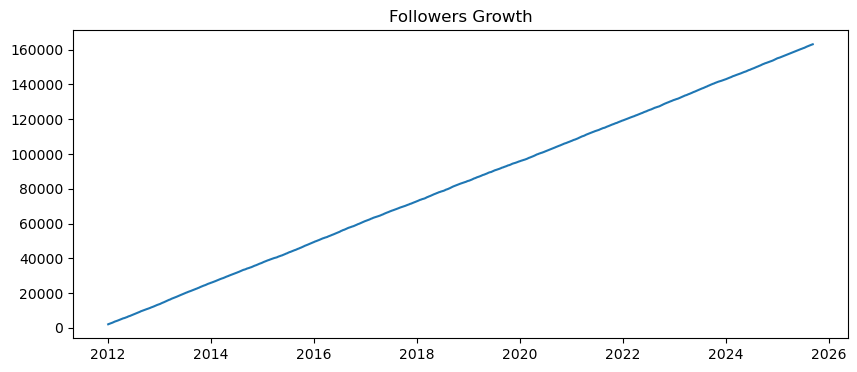

In [16]:
sample = df[df['Instagram_ID']==df['Instagram_ID'].iloc[0]]
plt.figure(figsize=(10,4))
plt.plot(sample['Date'],sample['Instagram_Followers'])
plt.title('Followers Growth')
plt.show()

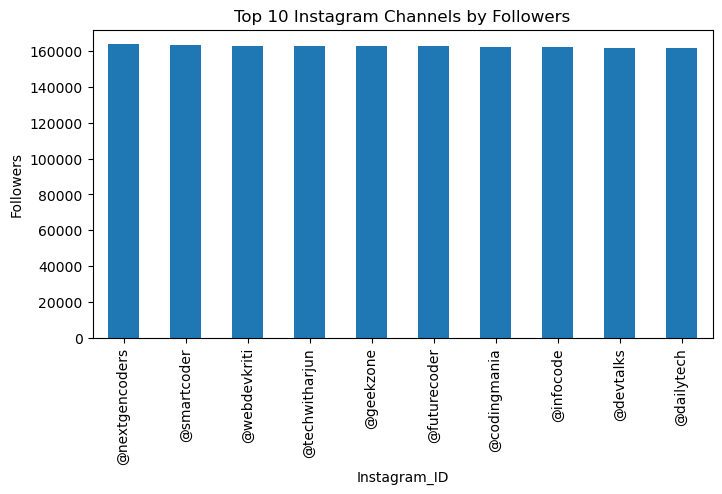

In [17]:
top_ig = df.groupby('Instagram_ID')['Instagram_Followers'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_ig.plot(kind='bar')
plt.title('Top 10 Instagram Channels by Followers')
plt.ylabel('Followers')
plt.show()

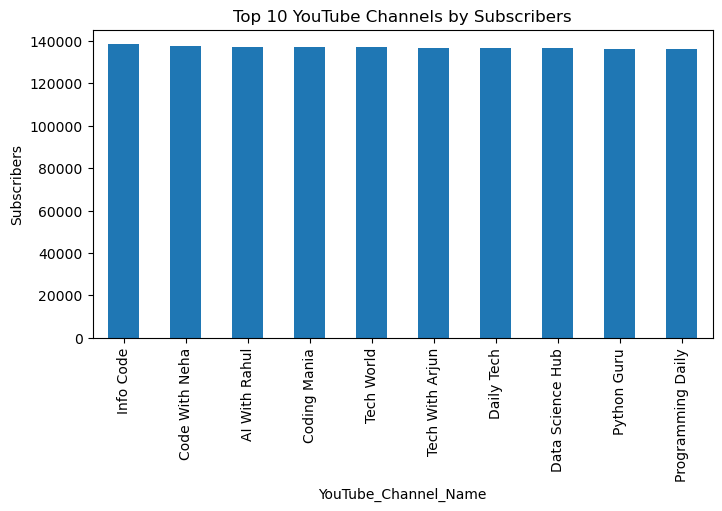

In [18]:
top_yt = df.groupby('YouTube_Channel_Name')['YouTube_Subscribers'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_yt.plot(kind='bar')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.ylabel('Subscribers')
plt.show()


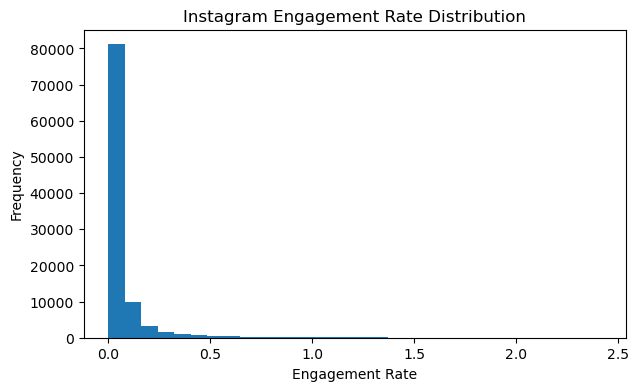

In [19]:
df['IG_Engagement_Rate'] = df['Instagram_Likes'] / df['Instagram_Followers']
plt.figure(figsize=(7,4))
plt.hist(df['IG_Engagement_Rate'].dropna(), bins=30)
plt.title('Instagram Engagement Rate Distribution')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

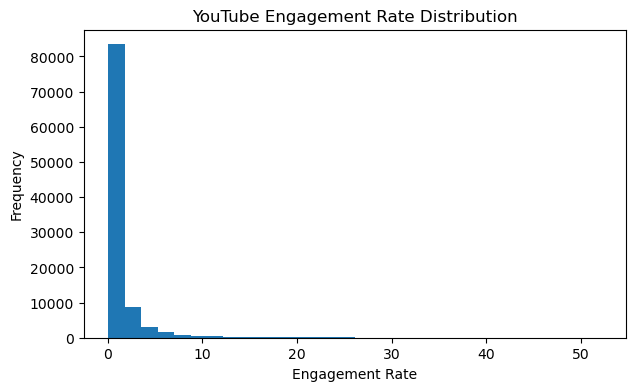

In [20]:
df['YT_Engagement_Rate'] = df['YouTube_Views'] / df['YouTube_Subscribers']
plt.figure(figsize=(7,4))
plt.hist(df['YT_Engagement_Rate'].dropna(), bins=30)
plt.title('YouTube Engagement Rate Distribution')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25092\1283083727.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ df['IG_Engagement_Rate'].dropna(), df['YT_Engagement_Rate'].dropna()], labels=['Instagram','YouTube'])


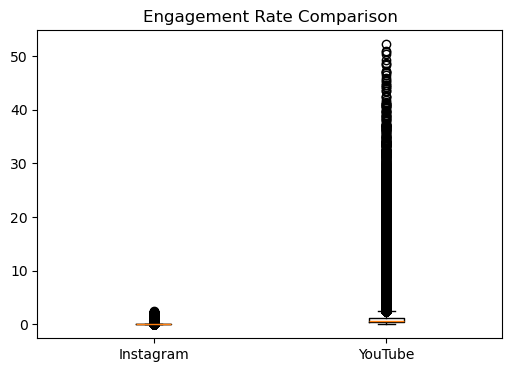

In [21]:
plt.figure(figsize=(6,4))
plt.boxplot([ df['IG_Engagement_Rate'].dropna(), df['YT_Engagement_Rate'].dropna()], labels=['Instagram','YouTube'])
plt.title('Engagement Rate Comparison')
plt.show()

🔟 Conclusion
These visualizations help understand growth, popularity, and engagement patterns across Instagram and YouTube in an intuitive way.